In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath('..'))
from src.preprocessing import load_data, parse_dates

In [2]:
df = load_data('../data/raw/site_1_train_data.csv')
df = parse_dates(df).set_index('timestamp')

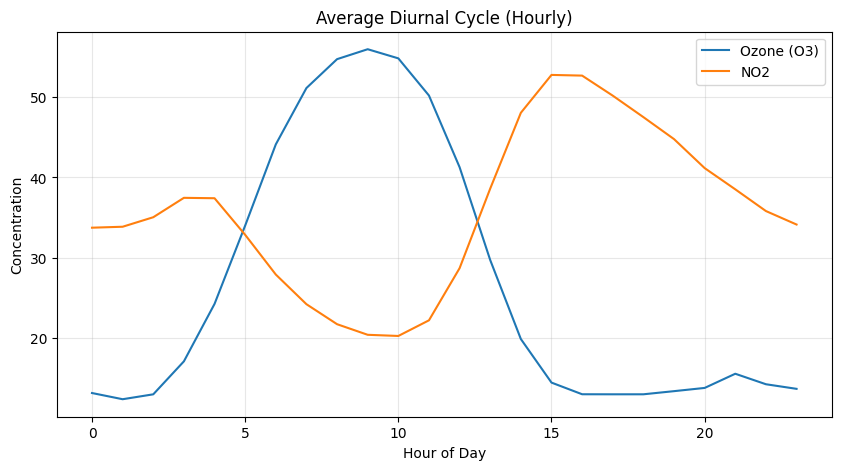

In [3]:
hourly_avg = df.groupby(df.index.hour)[['O3_target', 'NO2_target']].mean()
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg['O3_target'], label='Ozone (O3)')
plt.plot(hourly_avg.index, hourly_avg['NO2_target'], label='NO2')
plt.title('Average Diurnal Cycle (Hourly)')
plt.xlabel('Hour of Day')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

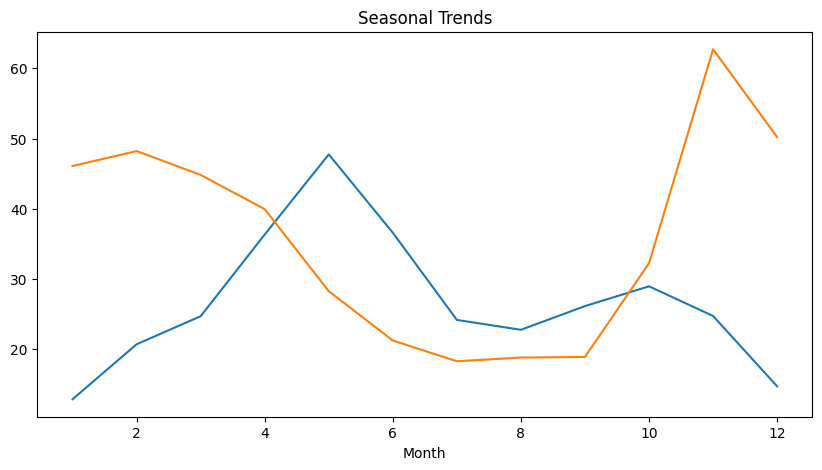

In [4]:
monthly_avg = df.groupby(df.index.month)[['O3_target', 'NO2_target']].mean()
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg['O3_target'], label='Ozone')
plt.plot(monthly_avg.index, monthly_avg['NO2_target'], label='NO2')
plt.title('Seasonal Trends')
plt.xlabel('Month')
plt.show()

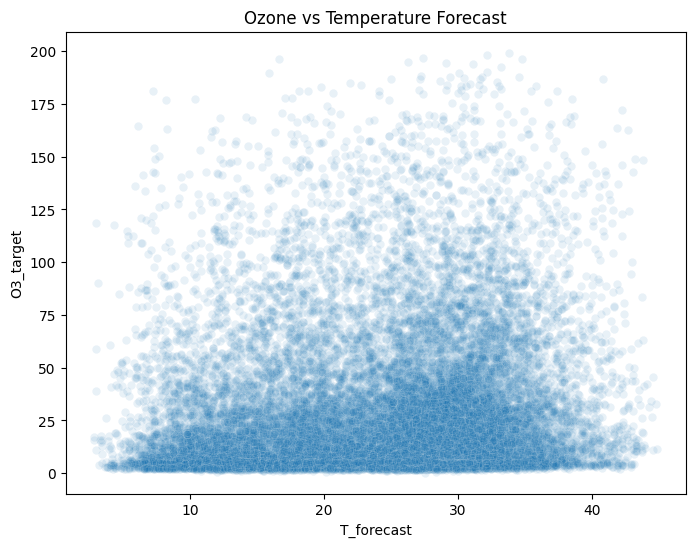

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='T_forecast', y='O3_target', alpha=0.1)
plt.title('Ozone vs Temperature Forecast')
plt.show()

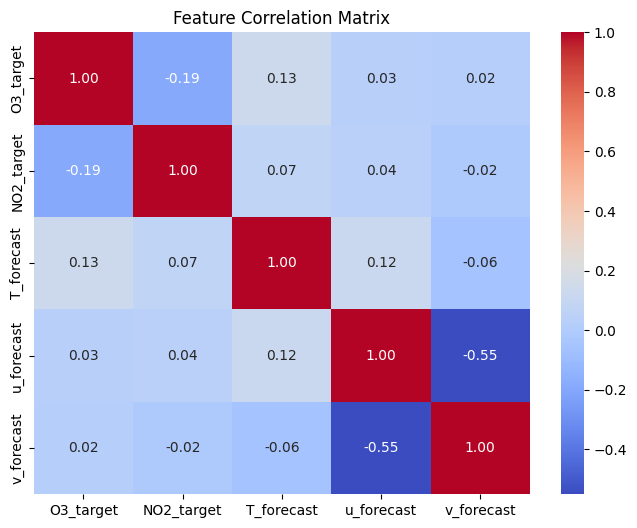

In [6]:
corr = df[['O3_target', 'NO2_target', 'T_forecast', 'u_forecast', 'v_forecast']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()